In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
 df=pd.read_csv('movie_data.csv')[0:1000]

In [3]:
df.head()

,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0


In [4]:
for i in range(10):
    print(df['review'][i],'-', df['sentiment'][i])
    print()

This movie is just crap. Even though the directors claim to be part of that oi-culture, it's still a very, very bad directorial debut. The topic itself is very interesting and I accept the bad acting due to the fact, that they are all amateurs and never acted before, but the worst thing about this film are the dialogs and very unexperienced and naive directing. There's no timing at all in that movie. I felt like the directors were so exited to do that movie (it's their first feature), that they actually never really asked themselves, what story they wanna tell. I met Ben (one of the directors) on several occasions and he's a nice and thoughtful guy, but that doesn't make him a director. I think, that "American History X" is full of clichÃ©s, but somehow manages to transport a story. "Oi!Warning" is full of clichÃ©s, doesn't tell anything new or provocative and (-that's the sad thing about this movie) it's far from any Oi!-Reality.<br /><br />If you wanna see weird but great German film

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [7]:
df.describe()

,sentiment
count,1000.000000
mean,0.501000
std,0.500249
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df.drop_duplicates(inplace= True, keep = 'first')

In [10]:
df.duplicated().sum()

0

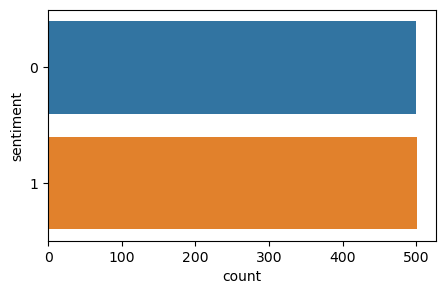

In [11]:
plt.figure(figsize = (5,3))
sns.countplot(y = df['sentiment'])
plt.show()

In [12]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [13]:
def preprocess(sentence):
    #removes all the special characters and split the sentence at spaces
    text = re.sub(r"[^a-zA-Z0-9]"," ",sentence).split()
    
    # converts words to lowercase and removes any stopwords
    words = [x.lower() for x in text if x not in stopwords.words('english')]
    
    # Lemmatize the words
    lemma = WordNetLemmatizer()
    word = [lemma.lemmatize(word,'v') for word in words ]
    
    # convert the list of words back into a sentence
    word = ' '.join(word)
    return word

In [14]:
df['review'] = df['review'].apply(preprocess)

In [15]:
for i in range(10):
    print(df['review'][i])
    print()

this movie crap even though directors claim part oi culture still bad directorial debut the topic interest i accept bad act due fact amateurs never act worst thing film dialogs unexperienced naive direct there time movie i felt like directors exit movie first feature actually never really ask story wanna tell i meet ben one directors several occasion nice thoughtful guy make director i think american history x full clich somehow manage transport story oi warn full clich tell anything new provocative sad thing movie far oi reality br br if wanna see weird great german film watch movies michael haneke christoph schlingensief oskar roehler hans weingartner oliver hirschbiegel br br benny video funny game die unber hrbare mein letzter film das experiment das weisse rauschen muxm uschenstill br br ten topic photography

another detail work subject dr dwivedi take us back time pre partioned panjab dr dwivedi choose difficult subject movie debut he work meticulous detail bring story life the 

In [16]:
X = df['review']
y = df['sentiment']

In [17]:
from sklearn.preprocessing import LabelBinarizer

In [18]:
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [19]:
y.shape

(1000, 1)

In [20]:
X.shape

(1000,)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [23]:
tokenizer = Tokenizer(num_words=128)

In [24]:
tokenizer.fit_on_texts(X)

In [25]:
tokenizer.word_index

{'br': 1,
 'i': 2,
 'film': 3,
 'the': 4,
 'movie': 5,
 'one': 6,
 'make': 7,
 'like': 8,
 'see': 9,
 'it': 10,
 'get': 11,
 'time': 12,
 'this': 13,
 'good': 14,
 'watch': 15,
 'character': 16,
 'go': 17,
 'think': 18,
 'even': 19,
 'story': 20,
 'really': 21,
 'would': 22,
 'show': 23,
 'love': 24,
 'also': 25,
 'well': 26,
 'end': 27,
 'people': 28,
 'look': 29,
 'know': 30,
 'much': 31,
 'first': 32,
 'give': 33,
 'say': 34,
 'act': 35,
 'play': 36,
 'bad': 37,
 'way': 38,
 'great': 39,
 'come': 40,
 'take': 41,
 'find': 42,
 'could': 43,
 'plot': 44,
 'want': 45,
 'seem': 46,
 'life': 47,
 'movies': 48,
 'work': 49,
 'never': 50,
 'but': 51,
 'two': 52,
 'best': 53,
 'a': 54,
 'there': 55,
 'many': 56,
 'try': 57,
 'and': 58,
 'ever': 59,
 'better': 60,
 'in': 61,
 'little': 62,
 'scene': 63,
 'if': 64,
 'use': 65,
 'real': 66,
 'man': 67,
 'star': 68,
 'funny': 69,
 'still': 70,
 'part': 71,
 'interest': 72,
 'actually': 73,
 'feel': 74,
 'back': 75,
 'he': 76,
 'years': 77,
 'so

In [26]:
vocab_size = len(tokenizer.word_index) + 1

In [27]:
def text_encoding(txt):
    encoded_docs=tokenizer.texts_to_sequences(txt)
    padded_sequences=pad_sequences(encoded_docs,maxlen=128)
    return padded_sequences

In [28]:
X_train = text_encoding(X_train)
X_test = text_encoding(X_test)

In [29]:
X_train.shape

(800, 128)

In [30]:
X_test.shape

(200, 128)

In [31]:
y_test.shape

(200, 1)

In [32]:
y_train.shape

(800, 1)

In [36]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense


In [37]:
embedding_dim = 128

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=128)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
model.fit(X_train, y_train, epochs=10, validation_split = 0.2)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 323ms/step - accuracy: 0.5192 - loss: 0.6930 - val_accuracy: 0.6062 - val_loss: 0.6589
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 258ms/step - accuracy: 0.7191 - loss: 0.6066 - val_accuracy: 0.6250 - val_loss: 0.6476
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 255ms/step - accuracy: 0.7459 - loss: 0.5155 - val_accuracy: 0.6375 - val_loss: 0.6420
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 255ms/step - accuracy: 0.7693 - loss: 0.4848 - val_accuracy: 0.6750 - val_loss: 0.6610
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 259ms/step - accuracy: 0.8177 - loss: 0.4253 - val_accuracy: 0.7188 - val_loss: 0.6603
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 258ms/step - accuracy: 0.8188 - loss: 0.4086 - val_accuracy: 0.6625 - val_loss: 0.6985
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 258ms/step - accuracy: 0.8483 - loss: 0.3634 - val_accuracy: 0.6500 - val_loss: 0.6892
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 253ms/step - accuracy: 0.8952 - loss: 0.2998 - val_accuracy: 0

In [41]:
y_pred=model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 289ms/step


In [42]:
def convert_to_class(y_pred):
    class_labels = []
    for i in y_pred:
        if i < 0.5:
            class_labels.append(0)
        else:
            class_labels.append(1)
    return class_labels

In [43]:
predicted_classes = convert_to_class(y_pred)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [45]:
accuracy_score(y_test,predicted_classes)

0.68

<Axes: >

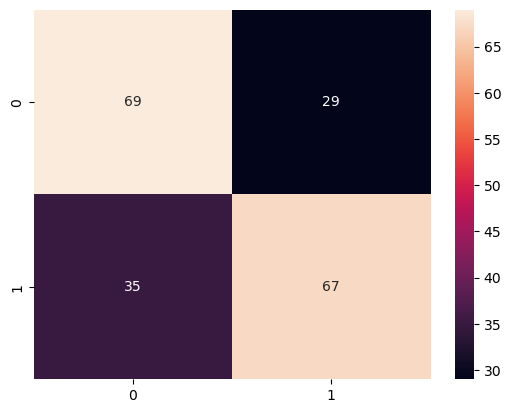

In [46]:
sns.heatmap(confusion_matrix(y_test,predicted_classes),annot=True,fmt='d')

In [47]:
print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68        98
           1       0.70      0.66      0.68       102

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.68      0.68      0.68       200

